In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

These are the necessary imports for the script:

1. `load_iris` is a function that loads the Iris dataset, a classic dataset in machine learning and statistics. 2. It's included in scikit-learn in the datasets module.

2. `train_test_split` is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

3. `KNeighborsClassifier` is the K-nearest neighbors classifier class in the sklearn.neighbors module.

4. `metrics` module in sklearn allows us to calculate measures such as accuracy, precision, recall, etc. for our model.

In [3]:
# Load dataset
iris = load_iris()

The `load_iris()` function loads the iris dataset into the **iris** object.



In [4]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.4,
    random_state=5)


The `train_test_spli`t function shuffles the dataset and then splits it. Here, 40% of the data is set aside for testing and the rest 60% for training.

The `random_state `parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.

In [5]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

A `KNeighborsClassifier` is instantiated with one parameter: `n_neighbors` is set to 3. This is the `k` value of the KNN. The classifier is then fitted on the training data.

In [6]:
# Make predictions
y_pred = knn.predict(X_test)

The model makes predictions on the test data (**X_test**) and stores the result in **y_pred**.

In [7]:
# Evaluate our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


Finally, the accuracy of the model's predictions is computed by comparing the predicted values `y_pred` with the actual values `y_test`.

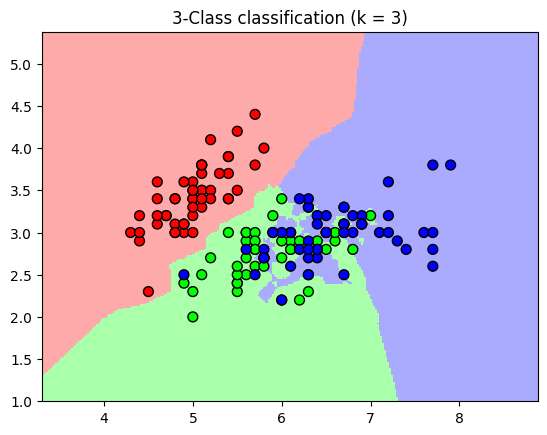

In [8]:
# These lines import the necessary libraries for the script.
# Matplotlib and seaborn are plotting libraries, numpy is used for numerical operations.
# ListedColormap is a class that generates a colormap from a list of colors.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

# Here, we define our features X and target y.
# We only use the first two features of the iris dataset for simplicity (since easier to visualize in 2D).
X = iris.data[:, :2]
y = iris.target

# Create color maps
# We create two color maps, cmap_light and cmap_bold, using ListedColormap.
# These will be used for coloring the points in the plot.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Model the Algorithm and fit it.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Plot the decision boundary by assigning a color in the color map
# to each mesh point.
mesh_step_size = .02  # `mesh_step_size` defines the step size for the meshgrid, which will be used for the background of the plot.
plot_symbol_size = 50 # `plot_symbol_size` defines the size of the points that will be plotted

# This section creates a meshgrid for the plot.
# x_min, x_max, y_min, and y_max define the boundaries of the grid.
# xx and yy are the coordinates of the points in the grid.
# Z is the predicted class of each point in the grid using our KNN classifier.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[:, 0], X[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i)" % (3))
plt.show()
